## Imports and installations

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install top2vec==1.0.16
!pip install tensorflow tensorflow_hub tensorflow_text
!pip install 'top2vec[sentence_encoders]'
# !pip install 'top2vec[sentence_transformers]'
# !pip install 'top2vec[indexing]'
# !pip install 'top2vec[batch_size]'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 5.2 MB 47.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 46.3 MB/s 
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=d885a7381eb9dfd5ad921721a4dbd42af31859543b417edc21598c432cde6053
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342138 sha256=337e2c8ba49ad3b6f57ced3086a3df66ccf194a6f1cbca56948431751c848e71
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-n

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from top2vec import Top2Vec
import numpy as np

# Read data

In [ ]:
df = pd.read_csv('drive/MyDrive/data/embedding_projector_dataset.csv')

In [ ]:
df.shape

(17071, 6)

In [ ]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count
0,0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0
1,1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0
2,2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0
3,3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0
4,4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0


# Pre-processing imports and run

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
!pip install nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import string
string.punctuation 
stop_words = stopwords.words('english')
# -*- coding: utf-8 -*-
punctuation = [ c for c in string.punctuation ] + [u'\u201c',u'\u201d',u'\u2018',u'\u2019']
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def remove_punc(text):
    txt=text
    for punc in punctuation:
        txt = txt.replace(punc, " ")
    txt = txt.lower()
    return txt 

def remove_URL_and_HTML(row):
    row = re.sub(r'http.*$', "", row)
    row = re.sub(r'https.*$', "", row)
    return row

def remove_stopwords(row):
    row = word_tokenize(row)
    return ' '.join(w for w in row if not w in stop_words)

def lemmatize(row):
    lemmatizer = WordNetLemmatizer()
    row = [lemmatizer.lemmatize(word) for word in row.split()]
    return ' '.join(row)

def preprocessing(col):
    col = col.astype(str)
    punctuation_list = col.apply(remove_punc)
    URL = punctuation_list.apply(remove_URL_and_HTML)
    lem = URL.apply(lemmatize)
    word_tokens = lem.apply(remove_stopwords) 
    return word_tokens

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.shape

(17071, 5)

In [ ]:
df.Text[0]

"Rwanda policy is having 'NO impact' on migrants: UK borders inspector says numbers crossing Channel 'have gone up' https://t.co/5cVJ8bhhG1"

In [ ]:
df_final = df.copy()

In [ ]:
df_final.shape

(17071, 5)

In [ ]:
df_final = df_final.iloc[:4001,:]

In [ ]:
df_final.shape

(4001, 5)

In [ ]:
df_final.Datetime[0]

'2022-06-08 16:00:06+00:00'

In [ ]:
df_final.Datetime[4000]

'2017-03-03 03:01:06+00:00'

In [ ]:
df_final['preprocessed'] = preprocessing(df_final['Text'])

In [ ]:
# index df from 2018 - December 2020 
list_tweets_final = [str(i) for i in df_final['preprocessed']]

In [ ]:
len(list_tweets_final)

4001

## Run Top2Vec Model

In [ ]:
%%time 
model = Top2Vec(list_tweets_final,
        speed='deep-learn',
        min_count=100, 
        embedding_model='universal-sentence-encoder')

2022-06-16 07:53:51,942 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-16 07:53:52,172 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-06-16 07:54:18,575 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-16 07:54:19,531 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

CPU times: user 59.6 s, sys: 4.24 s, total: 1min 3s
Wall time: 1min 11s


In [ ]:
!ls

drive  sample_data


In [ ]:
model.save('FINAL_model')

In [ ]:
model

In [ ]:
model.get_num_topics()

37

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["migrant"], num_topics=5)
topic_nums

array([ 0, 32, 20,  8, 33])

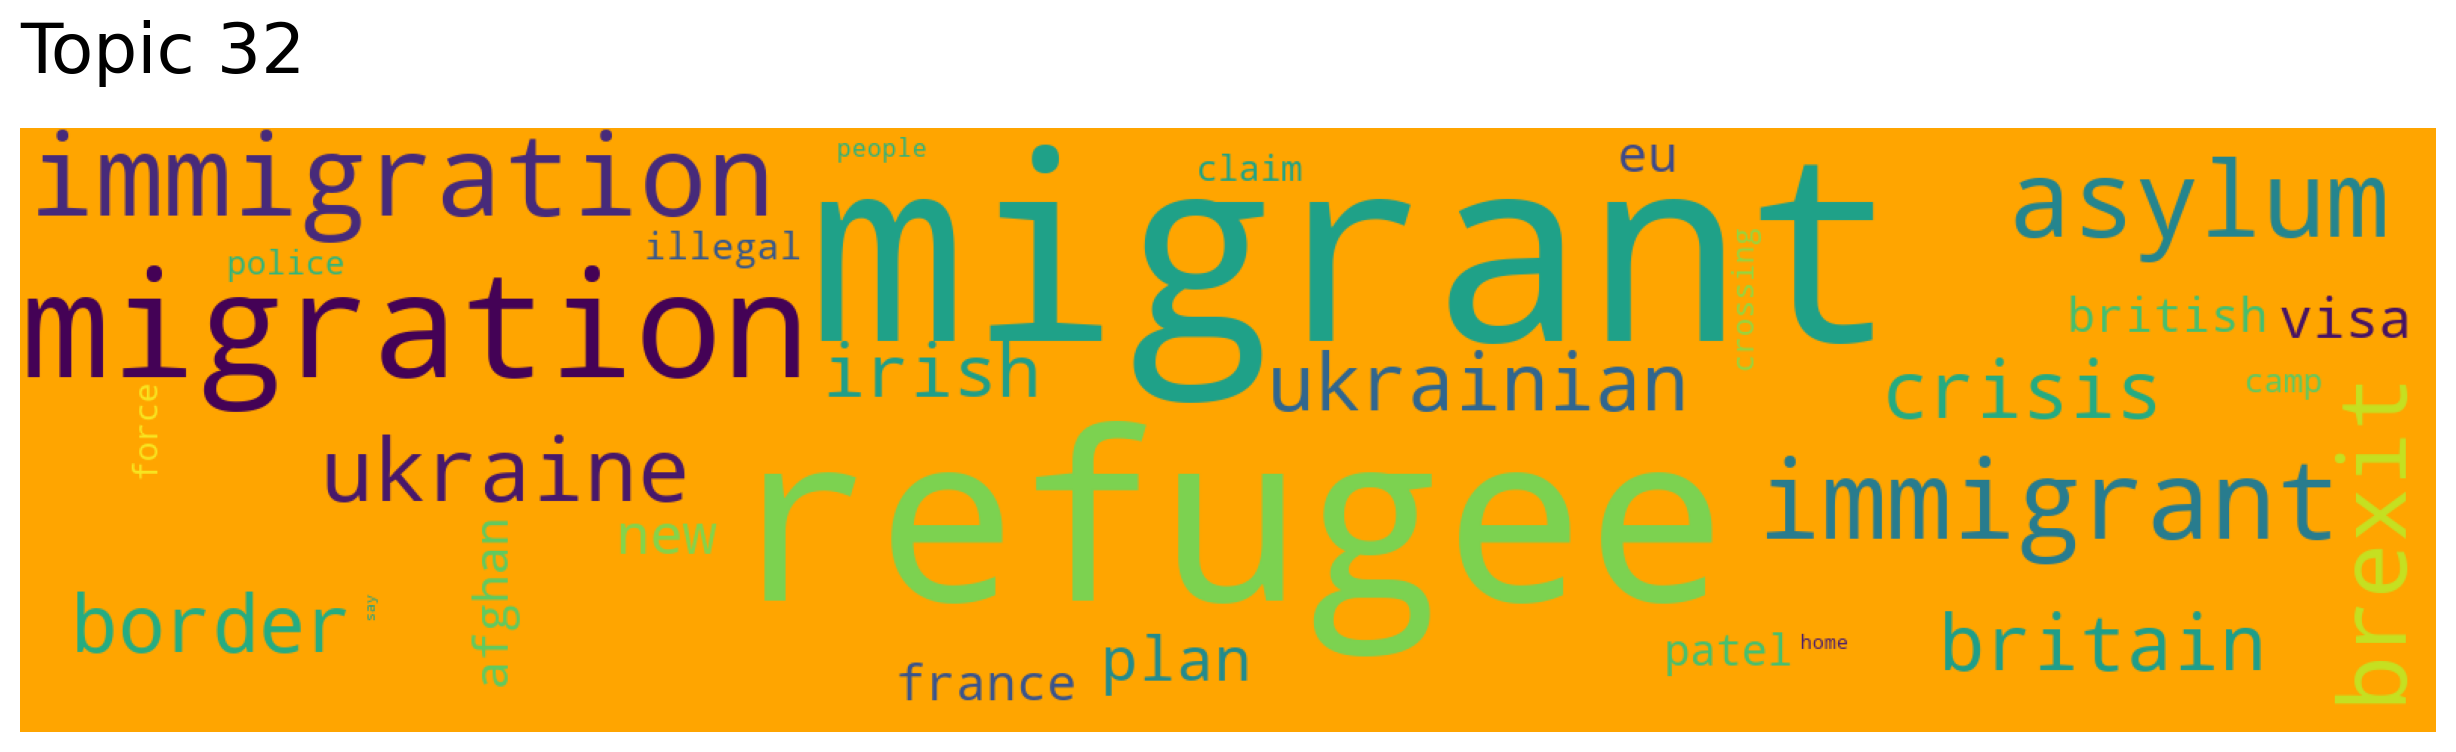

In [ ]:
model.generate_topic_wordcloud(topic_num=32, background_color='orange')

In [ ]:
model.__dict__

{'_tokenizer': <function top2vec.Top2Vec.default_tokenizer>,
 'doc_dist': array([0.60126376, 0.65934014, 0.6476892 , ..., 0.7081424 , 0.76525545,
        0.732028  ], dtype=float32),
 'doc_dist_reduced': None,
 'doc_id2index': None,
 'doc_id_type': numpy.int64,
 'doc_top': array([32,  1,  1, ..., 26, 16,  1]),
 'doc_top_reduced': None,
 'document_ids': None,
 'document_vectors': array([[-0.0105029 , -0.04888082,  0.05450291, ..., -0.00679502,
         -0.05800613, -0.0646892 ],
        [-0.00463017, -0.04627897, -0.00687668, ...,  0.05505084,
          0.05466734, -0.0625791 ],
        [-0.06905132, -0.06881928, -0.02828237, ...,  0.04977489,
         -0.03271402, -0.08023053],
        ...,
        [-0.00352283, -0.02895978,  0.06011181, ...,  0.03403758,
         -0.03155893, -0.07739177],
        [ 0.02030542, -0.06755701, -0.02820391, ...,  0.02488394,
         -0.06245465, -0.07041959],
        [ 0.04335992, -0.0356236 , -0.0258126 , ...,  0.06476225,
         -0.01968884, -0.07173

In [ ]:
vectors = model._get_document_vectors()

In [ ]:
vectors[0]

array([-0.0105029 , -0.04888082,  0.05450291, -0.01742627, -0.02206396,
       -0.00980145,  0.04833677,  0.04183814,  0.05447833, -0.04317443,
        0.06296565,  0.00265519,  0.03020651, -0.02295602,  0.0060702 ,
       -0.06390067,  0.03965926,  0.06665177, -0.05669326,  0.0361309 ,
       -0.06626053,  0.01053466, -0.05686637,  0.02385085, -0.0162731 ,
       -0.03327205, -0.07064608, -0.0144244 ,  0.04853556,  0.02768666,
       -0.05314651,  0.03313374,  0.04431308, -0.00999994, -0.02077753,
        0.06189359,  0.0062275 ,  0.06745995,  0.03671676, -0.03072318,
       -0.01965091, -0.01532106,  0.02888988, -0.04704227, -0.03320899,
       -0.06155219,  0.03480608, -0.03157261,  0.01350481, -0.00791449,
       -0.06787694,  0.05785088, -0.05496293,  0.05007748,  0.04001269,
       -0.06925967,  0.02806556, -0.00148885, -0.02963036,  0.04194764,
       -0.00250567,  0.01247062, -0.00152526, -0.0255656 ,  0.05800908,
        0.03121937,  0.06068539, -0.00427341,  0.03867865, -0.01

## Principal Component Analysis - to reduce vectors to 50 dims for embedding projector

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(vectors)

StandardScaler()

In [ ]:
transformed_vectors = scaler.transform(vectors)
transformed_vectors

array([[-0.45129743, -0.49756783,  1.306032  , ..., -0.8019718 ,
        -0.6049886 ,  0.00613937],
       [-0.2882727 , -0.42924148, -0.31002015, ...,  1.0402709 ,
         2.795818  ,  0.10315482],
       [-2.0765765 , -1.0211651 , -0.8736068 , ...,  0.8831129 ,
         0.15839949, -0.7084022 ],
       ...,
       [-0.25753355,  0.02557217,  1.4537075 , ...,  0.4143353 ,
         0.19326338, -0.5778847 ],
       [ 0.40392858, -0.98801726, -0.8715409 , ...,  0.14166991,
        -0.73925775, -0.25732625],
       [ 1.0439117 , -0.14942437, -0.8085807 , ...,  1.3295511 ,
         0.55153656, -0.31783536]], dtype=float32)

In [ ]:
pca = PCA(n_components=50)
pca.fit(transformed_vectors)
pca_vectors = pca.transform(transformed_vectors)
pca_df = pd.DataFrame(pca_vectors)

In [ ]:
pca_df.shape

(4001, 50)

In [ ]:
reduced_pca_df = pca_df.iloc[:4000,]

Create vector TSV file for tensorflowm embedding projector

In [ ]:
reduced_pca_df.to_csv('4kuniPCAembedding.tsv', sep='\t', encoding='utf-8', index=False)

In [ ]:
!pwd

/content


In [ ]:
pca_df.to_csv('PCAembedding.tsv', sep='\t', encoding='utf-8', index=False)

In [ ]:
!pwd

/content


In [ ]:
#embedding_df = pd.DataFrame(vectors)

In [ ]:
#embedding_df.shape

(17071, 300)

In [ ]:
#embedding_df.to_csv('embedding.tsv', sep='\t', encoding='utf-8', index=False)

## Prepare metadata TSV file for tensorflow embedding projector

In [ ]:
df_roberta = pd.read_csv('/content/drive/MyDrive/data/roberta datasets/roberta_for_embedding.csv')

In [ ]:
df_roberta.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,joy,optimism,anger,sadness,positive,neutral,negative
0,0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,0.0087,0.0678,0.4097,0.5138,0.0166,0.4520,0.5313
1,1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,0.0075,0.0162,0.7976,0.1787,0.0054,0.1190,0.8756
2,2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,0.0218,0.1511,0.5018,0.3253,0.0217,0.7471,0.2312
3,3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,0.0084,0.0223,0.1745,0.7949,0.0052,0.1088,0.8860
4,4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,0.0090,0.0191,0.8268,0.1451,0.0048,0.1251,0.8701


In [ ]:
df_roberta = df_roberta.drop(columns=['Unnamed: 0'])
df_roberta

,Datetime,Tweet Id,Text,Username,Like Count,joy,optimism,anger,sadness,positive,neutral,negative
0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,0.0087,0.0678,0.4097,0.5138,0.0166,0.4520,0.5313
1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,0.0075,0.0162,0.7976,0.1787,0.0054,0.1190,0.8756
2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,0.0218,0.1511,0.5018,0.3253,0.0217,0.7471,0.2312
3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,0.0084,0.0223,0.1745,0.7949,0.0052,0.1088,0.8860
4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,0.0090,0.0191,0.8268,0.1451,0.0048,0.1251,0.8701
...,...,...,...,...,...,...,...,...,...,...,...,...
17066,2008-08-20 12:54:31+00:00,893204721,Thailand officials to deport laughing Glitter ...,MailOnline,0.0,0.0263,0.0436,0.0841,0.8461,0.0183,0.7520,0.2297
17067,2008-08-19 12:51:42+00:00,892082485,Pictured: The trail of destruction left by bus...,MailOnline,0.0,0.0080,0.0136,0.0493,0.9291,0.0056,0.1451,0.8493
17068,2008-08-18 20:22:00+00:00,891418251,One killed and up to 40 injured after migrant ...,MailOnline,0.0,0.0096,0.0271,0.0941,0.8692,0.0059,0.2041,0.7900
17069,2008-08-14 12:52:03+00:00,887337505,Gary Glitter to be deported back to Britain af...,MailOnline,0.0,0.0341,0.0182,0.3142,0.6335,0.0101,0.4600,0.5299


Previous Top2Vec viz with plotly - ignore hashed cells

In [ ]:
# reduced2d = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine', verbose=True).fit_transform(vectors)

In [ ]:
# import matplotlib.pyplot as plt
# x, y = reduced2d[:,0], reduced2d[:,1]
# plt.scatter(x,y)

In [ ]:
# reduced3d = umap.UMAP(n_neighbors=15, n_components=3, metric='cosine', verbose=True).fit_transform(vectors)

In [ ]:
# reduced3d.shape

In [ ]:
# import plotly.express as px
# fig = px.scatter_3d(x=reduced3d[:,0], y=reduced3d[:,1], z=reduced3d[:,2])
# fig.show()

In [ ]:
# topic_of_interest = 0
# topic_sizes, topic_nums = model_final.get_topic_sizes()
# documents, document_scores, document_ids = model_final.search_documents_by_topic(topic_num=topic_of_interest, num_docs=topic_sizes[topic_of_interest])

In [ ]:
model.get_num_topics()

37

In [ ]:
df_roberta = df_roberta.iloc[:4001,:]

In [ ]:
df_roberta.shape

(4001, 12)

Create a Topic column - assign topic number per row / tweet in df

In [ ]:
topic_of_interest = np.arange(0, 37, 1)
dict_tweet = {}
for topic in topic_of_interest:
  topic_sizes, topic_nums = model.get_topic_sizes()
  documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic, num_docs=topic_sizes[topic])
  dict_tweet[topic] = [document_ids]

In [ ]:
dict_tweet

{0: [array([2550, 1174, 1760, 1759, 1262, 1520, 1519, 1180, 1178, 1762, 2355,
         1094, 1983, 2443, 1264,  969,  971,  988,  777, 1261, 1880, 1976,
         1978, 1226,  184, 2046, 2999, 1297, 2522, 1160, 2491, 1959, 1663,
         1974, 1199, 1201, 1939, 1665, 1773,  703, 1947, 2757, 2268, 1230,
         2613, 2868, 1988, 2300, 2772, 1981, 2759, 3849, 1794, 1374,  717,
         1302, 1420, 2463, 2023, 2710, 1991, 1523, 3920, 1944, 1917, 1979,
         2140, 2153, 1190, 2764, 1918, 1920, 1995, 3757,  519, 2667,  663,
          664, 2386, 2013,  761,  770, 3754, 3919,  799, 2089, 1761,  769,
         1200, 2704, 2097,  905, 2265, 3264, 1537, 1536, 1785, 1774, 1584,
         2565, 1834, 2686,  661, 2785,  762,  748, 1824, 1823, 2427, 2580,
         1176, 2951, 2002, 1299,  831, 2419, 2333, 2723,  763,  679, 1274,
         1675, 1271, 1154, 3315, 1902, 2642, 2324, 1248, 2503, 2504, 2506,
          151, 2700, 1314, 1866, 1867, 1869, 1945, 2586, 2948, 1215, 1217,
          131, 1515, 1

In [ ]:
for index, row in df_roberta.iterrows():
  for key, values in dict_tweet.items():
    if index in values[0]:
      df_roberta.loc[index,'Topic'] = key
      pass
      # print(key)
      # print("-------test-------")
      # print(df_roberta.loc[index,'Topic'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_roberta.Topic.nunique()

37

In [ ]:
#topic_nums, topic_score, topics_words, word_scores = model.get_documents_topics([0])

In [ ]:
#topic_nums

In [ ]:
#documents, doc_scores, doc_ids = model.search_documents_by_documents([0], 1)

In [ ]:
#documents

In [ ]:
#topic_words, word_scores, topic_nums = model.get_topics()

In [ ]:
#topic_words[9]

In [ ]:
df_roberta.Topic

0       32.0
1        1.0
2        1.0
3       32.0
4        4.0
        ... 
3996    26.0
3997    26.0
3998    26.0
3999    16.0
4000     1.0
Name: Topic, Length: 4001, dtype: float64

In [ ]:
df_roberta["Topic"] = df_roberta["Topic"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_roberta

,Datetime,Tweet Id,Text,Username,Like Count,joy,optimism,anger,sadness,positive,neutral,negative,Topic
0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,0.0087,0.0678,0.4097,0.5138,0.0166,0.4520,0.5313,32
1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,0.0075,0.0162,0.7976,0.1787,0.0054,0.1190,0.8756,1
2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,0.0218,0.1511,0.5018,0.3253,0.0217,0.7471,0.2312,1
3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,0.0084,0.0223,0.1745,0.7949,0.0052,0.1088,0.8860,32
4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,0.0090,0.0191,0.8268,0.1451,0.0048,0.1251,0.8701,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,2017-03-04 17:53:03+00:00,838084889060782083,Mexican congressman MOCKS Donald Trump by posi...,Daily_Express,2.0,0.0188,0.0305,0.9058,0.0449,0.0223,0.5667,0.4110,26
3997,2017-03-04 13:33:19+00:00,838019526205784064,Mexican congressman MOCKS Donald Trump by posi...,Daily_Express,7.0,0.0188,0.0305,0.9058,0.0449,0.0223,0.5667,0.4110,26
3998,2017-03-04 05:14:43+00:00,837894051579953152,Trump administration ‘could separate women &am...,Daily_Express,3.0,0.0138,0.0728,0.5325,0.3809,0.0164,0.7485,0.2352,26
3999,2017-03-03 09:35:02+00:00,837597173923647488,Desperate Merkel flies to North Africa to tack...,Daily_Express,7.0,0.0072,0.0226,0.0892,0.8810,0.0307,0.6359,0.3334,16


In [ ]:
topic_words, word_scores, topic_nums = model.get_topics()

In [ ]:
df_roberta['Topic Words'] = df_roberta['Topic'].apply(lambda x: topic_words[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_roberta

,Datetime,Tweet Id,Text,Username,Like Count,joy,optimism,anger,sadness,positive,neutral,negative,Topic,Topic Words
0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,0.0087,0.0678,0.4097,0.5138,0.0166,0.4520,0.5313,32,"[migrant, refugee, migration, immigration, imm..."
1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,0.0075,0.0162,0.7976,0.1787,0.0054,0.1190,0.8756,1,"[asylum, refugee, migrant, immigrant, immigrat..."
2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,0.0218,0.1511,0.5018,0.3253,0.0217,0.7471,0.2312,1,"[asylum, refugee, migrant, immigrant, immigrat..."
3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,0.0084,0.0223,0.1745,0.7949,0.0052,0.1088,0.8860,32,"[migrant, refugee, migration, immigration, imm..."
4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,0.0090,0.0191,0.8268,0.1451,0.0048,0.1251,0.8701,4,"[refugee, migrant, ukraine, ukrainian, asylum,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,2017-03-04 17:53:03+00:00,838084889060782083,Mexican congressman MOCKS Donald Trump by posi...,Daily_Express,2.0,0.0188,0.0305,0.9058,0.0449,0.0223,0.5667,0.4110,26,"[border, immigration, migrant, immigrant, refu..."
3997,2017-03-04 13:33:19+00:00,838019526205784064,Mexican congressman MOCKS Donald Trump by posi...,Daily_Express,7.0,0.0188,0.0305,0.9058,0.0449,0.0223,0.5667,0.4110,26,"[border, immigration, migrant, immigrant, refu..."
3998,2017-03-04 05:14:43+00:00,837894051579953152,Trump administration ‘could separate women &am...,Daily_Express,3.0,0.0138,0.0728,0.5325,0.3809,0.0164,0.7485,0.2352,26,"[border, immigration, migrant, immigrant, refu..."
3999,2017-03-03 09:35:02+00:00,837597173923647488,Desperate Merkel flies to North Africa to tack...,Daily_Express,7.0,0.0072,0.0226,0.0892,0.8810,0.0307,0.6359,0.3334,16,"[migrant, refugee, brexit, immigration, immigr..."


In [ ]:
df_roberta['Topic'].nunique()

37

In [ ]:
# function that returns given text based on ID


def return_my_text(index):
  return df_roberta.loc[index, 'Text']


In [ ]:
return_my_text(4000)

"'Jihadist executioner' asylum seeker arrested in Germany https://t.co/C2KTv4LxNY"

In [ ]:
df_roberta['preprocessed'] = preprocessing(df_roberta['Text'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_roberta.head()

,Datetime,Tweet Id,Text,Username,Like Count,joy,optimism,anger,sadness,positive,neutral,negative,Topic,Topic Words,preprocessed
0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,0.0087,0.0678,0.4097,0.5138,0.0166,0.4520,0.5313,32,"[migrant, refugee, migration, immigration, imm...",rwanda policy impact migrant uk border inspect...
1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,0.0075,0.0162,0.7976,0.1787,0.0054,0.1190,0.8756,1,"[asylum, refugee, migrant, immigrant, immigrat...",asylum seeker claim uk hotel stay worse prison
2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,0.0218,0.1511,0.5018,0.3253,0.0217,0.7471,0.2312,1,"[asylum, refugee, migrant, immigrant, immigrat...",half 130 asylum seeker facing first deportatio...
3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,0.0084,0.0223,0.1745,0.7949,0.0052,0.1088,0.8860,32,"[migrant, refugee, migration, immigration, imm...",rwanda plan working 80 migrant land dover toda...
4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,0.0090,0.0191,0.8268,0.1451,0.0048,0.1251,0.8701,4,"[refugee, migrant, ukraine, ukrainian, asylum,...",anger hundred refugee child ukraine left stran...


In [ ]:
df_roberta['Year'] = df_roberta['Datetime'].apply(lambda x: x[0:4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_roberta_bins = df_roberta.copy()

Create a major emotion and major sentiment comlumn - better insights for TEP

In [ ]:
arr_roberta_emotion = np.array(df_roberta[['joy', 'optimism', 'anger', 'sadness']])
arr_roberta_sentiment = np.array(df_roberta[["positive", "neutral", "negative"]])

In [ ]:
emotion_arr = np.argmax(arr_roberta_emotion,axis=1)
emotion_list = emotion_arr.tolist()
dct = {0:'joy', 1:'optimism', 2:'anger', 3:'sadness'}
final_emotion_list = [dct[x] for x in emotion_list]
df_roberta_bins['max_emotion'] = final_emotion_list

In [ ]:
sentiment_arr = np.argmax(arr_roberta_sentiment,axis=1)
sentiment_list = sentiment_arr.tolist()
dct = {0:'positive', 1:'neutral', 2:'negative'}
final_sentiment_list = [dct[x] for x in sentiment_list]
df_roberta_bins['max_sentiment'] = final_sentiment_list

In [ ]:
df_roberta_bins

,Datetime,Tweet Id,Text,Username,Like Count,joy,optimism,anger,sadness,positive,neutral,negative,Topic,Topic Words,preprocessed,Year,max_emotion,max_sentiment
0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,0.0087,0.0678,0.4097,0.5138,0.0166,0.4520,0.5313,32,"[migrant, refugee, migration, immigration, imm...",rwanda policy impact migrant uk border inspect...,2022,sadness,negative
1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,0.0075,0.0162,0.7976,0.1787,0.0054,0.1190,0.8756,1,"[asylum, refugee, migrant, immigrant, immigrat...",asylum seeker claim uk hotel stay worse prison,2022,anger,negative
2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,0.0218,0.1511,0.5018,0.3253,0.0217,0.7471,0.2312,1,"[asylum, refugee, migrant, immigrant, immigrat...",half 130 asylum seeker facing first deportatio...,2022,anger,neutral
3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,0.0084,0.0223,0.1745,0.7949,0.0052,0.1088,0.8860,32,"[migrant, refugee, migration, immigration, imm...",rwanda plan working 80 migrant land dover toda...,2022,sadness,negative
4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,0.0090,0.0191,0.8268,0.1451,0.0048,0.1251,0.8701,4,"[refugee, migrant, ukraine, ukrainian, asylum,...",anger hundred refugee child ukraine left stran...,2022,anger,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,2017-03-04 17:53:03+00:00,838084889060782083,Mexican congressman MOCKS Donald Trump by posi...,Daily_Express,2.0,0.0188,0.0305,0.9058,0.0449,0.0223,0.5667,0.4110,26,"[border, immigration, migrant, immigrant, refu...",mexican congressman mock donald trump posing p...,2017,anger,neutral
3997,2017-03-04 13:33:19+00:00,838019526205784064,Mexican congressman MOCKS Donald Trump by posi...,Daily_Express,7.0,0.0188,0.0305,0.9058,0.0449,0.0223,0.5667,0.4110,26,"[border, immigration, migrant, immigrant, refu...",mexican congressman mock donald trump posing p...,2017,anger,neutral
3998,2017-03-04 05:14:43+00:00,837894051579953152,Trump administration ‘could separate women &am...,Daily_Express,3.0,0.0138,0.0728,0.5325,0.3809,0.0164,0.7485,0.2352,26,"[border, immigration, migrant, immigrant, refu...",trump administration could separate woman amp ...,2017,anger,neutral
3999,2017-03-03 09:35:02+00:00,837597173923647488,Desperate Merkel flies to North Africa to tack...,Daily_Express,7.0,0.0072,0.0226,0.0892,0.8810,0.0307,0.6359,0.3334,16,"[migrant, refugee, brexit, immigration, immigr...",desperate merkel fly north africa tackle migra...,2017,sadness,neutral


In [ ]:
type(np.array(df_roberta['joy']))

numpy.ndarray

Bins for emotions - Tensorflow Embedding Projector can only colour based on categorical data rather than continuous

In [ ]:
list_emotions = ["joy", "optimism", "anger", "sadness", "positive", "neutral", "negative"]
for emotion in list_emotions:
  df_roberta_bins[emotion] = pd.cut(df_roberta[emotion],
       5, labels=["very_low", "low", "neutral", "high", "very high"])

In [ ]:
df_roberta_bins

,Datetime,Tweet Id,Text,Username,Like Count,joy,optimism,anger,sadness,positive,neutral,negative,Topic,Topic Words,preprocessed,Year,max_emotion,max_sentiment
0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,very_low,very_low,neutral,neutral,very_low,neutral,neutral,32,"[migrant, refugee, migration, immigration, imm...",rwanda policy impact migrant uk border inspect...,2022,sadness,negative
1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,very_low,very_low,very high,very_low,very_low,very_low,very high,1,"[asylum, refugee, migrant, immigrant, immigrat...",asylum seeker claim uk hotel stay worse prison,2022,anger,negative
2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,very_low,very_low,neutral,low,very_low,high,low,1,"[asylum, refugee, migrant, immigrant, immigrat...",half 130 asylum seeker facing first deportatio...,2022,anger,neutral
3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,very_low,very_low,very_low,very high,very_low,very_low,very high,32,"[migrant, refugee, migration, immigration, imm...",rwanda plan working 80 migrant land dover toda...,2022,sadness,negative
4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,very_low,very_low,very high,very_low,very_low,very_low,very high,4,"[refugee, migrant, ukraine, ukrainian, asylum,...",anger hundred refugee child ukraine left stran...,2022,anger,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,2017-03-04 17:53:03+00:00,838084889060782083,Mexican congressman MOCKS Donald Trump by posi...,Daily_Express,2.0,very_low,very_low,very high,very_low,very_low,neutral,neutral,26,"[border, immigration, migrant, immigrant, refu...",mexican congressman mock donald trump posing p...,2017,anger,neutral
3997,2017-03-04 13:33:19+00:00,838019526205784064,Mexican congressman MOCKS Donald Trump by posi...,Daily_Express,7.0,very_low,very_low,very high,very_low,very_low,neutral,neutral,26,"[border, immigration, migrant, immigrant, refu...",mexican congressman mock donald trump posing p...,2017,anger,neutral
3998,2017-03-04 05:14:43+00:00,837894051579953152,Trump administration ‘could separate women &am...,Daily_Express,3.0,very_low,very_low,neutral,low,very_low,high,low,26,"[border, immigration, migrant, immigrant, refu...",trump administration could separate woman amp ...,2017,anger,neutral
3999,2017-03-03 09:35:02+00:00,837597173923647488,Desperate Merkel flies to North Africa to tack...,Daily_Express,7.0,very_low,very_low,very_low,very high,very_low,high,low,16,"[migrant, refugee, brexit, immigration, immigr...",desperate merkel fly north africa tackle migra...,2017,sadness,neutral


In [ ]:
reduced_df_roberta_bins = df_roberta_bins.iloc[:4001,]

In [ ]:
reduced_df_roberta_bins.shape

(4001, 18)

In [ ]:
no_text_meta_df_with_preprocessed_final = reduced_df_roberta_bins.drop(columns=['Topic Words', 'Tweet Id', 'Text', "positive","neutral", "negative"])
no_text_meta_df_with_preprocessed_final.shape

(4001, 12)

In [ ]:
no_text_meta_df_no_preprocessed = reduced_df_roberta_bins.drop(columns=['Topic Words', 'preprocessed', 'Tweet Id', 'Text'])
no_text_meta_df_no_preprocessed


,Datetime,Username,Like Count,joy,optimism,anger,sadness,positive,neutral,negative,Topic,Year
0,2022-06-08 16:00:06+00:00,DailyMailUK,2.0,very_low,very_low,neutral,neutral,very_low,neutral,neutral,48,2022
1,2022-06-08 12:56:00+00:00,Daily_Express,8.0,very_low,very_low,very high,very_low,very_low,very_low,very high,26,2022
2,2022-06-08 01:30:08+00:00,MailOnline,8.0,very_low,very_low,neutral,low,very_low,high,low,48,2022
3,2022-06-07 11:37:57+00:00,DailyMailUK,5.0,very_low,very_low,very_low,very high,very_low,very_low,very high,30,2022
4,2022-06-05 03:29:56+00:00,MailOnline,16.0,very_low,very_low,very high,very_low,very_low,very_low,very high,103,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2017-03-04 22:20:03+00:00,Daily_Express,11.0,very_low,very_low,high,low,very_low,very_low,very high,90,2017
3996,2017-03-04 17:53:03+00:00,Daily_Express,2.0,very_low,very_low,very high,very_low,very_low,neutral,neutral,2,2017
3997,2017-03-04 13:33:19+00:00,Daily_Express,7.0,very_low,very_low,very high,very_low,very_low,neutral,neutral,2,2017
3998,2017-03-04 05:14:43+00:00,Daily_Express,3.0,very_low,very_low,neutral,low,very_low,high,low,128,2017


In [ ]:
no_text_meta_df_with_preprocessed_final.to_csv('final4k_meta_uni_final.tsv', sep='\t', encoding='utf-8', index=False)

In [ ]:
!pwd

/content


In [ ]:
#Final tsvs for embedding model on tensorflow
no_text_meta_df_no_preprocessed.to_csv('final4k_meta_no_preprocessed.tsv', sep='\t', encoding='utf-8', index=False)
no_text_meta_df_with_preprocessed.to_csv('final4k_meta_with_preprocessed.tsv', sep='\t', encoding='utf-8', index=False)

In [ ]:
!pwd

/content


In [ ]:
no_text_meta_df.to_csv('meta_no_text.tsv', sep='\t', encoding='utf-8', index=False)

In [ ]:
df_roberta_bins.to_csv('robertabins_embedding.tsv', sep='\t', encoding='utf-8', index=False)

In [ ]:
reduced_df_roberta_bins.to_csv('4kMetaEmbedding.tsv', sep='\t', encoding='utf-8', index=False)

In [ ]:
#df_roberta.to_csv('roberta_embedding.tsv', sep='\t', encoding='utf-8', index=False)

In [ ]:
!pwd

/content


In [ ]:
# doc - https://top2vec.readthedocs.io/en/latest/api.html

In [ ]:
# viz - https://projector.tensorflow.org/

In [ ]:
# tensorflow embedding - https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin